In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly_express as px
from get_win_streak import get_win_streak


df = pd.read_csv("clean.csv")

In [70]:
df['win_count'] = df.groupby('champion_name').cumcount() + 1

In [71]:
df.tail(10)

,season,round,url,raceName,Circuit,date,champion_name,time,FirstPractice,SecondPractice,ThirdPractice,Qualifying,Sprint,win_count
1047,2021,13,http://en.wikipedia.org/wiki/2021_Dutch_Grand_...,Dutch Grand Prix,"{'circuitId': 'zandvoort', 'url': 'http://en.w...",2021-09-05,Max Verstappen,13:00:00Z,{'date': '2021-09-03'},{'date': '2021-09-03'},{'date': '2021-09-04'},{'date': '2021-09-04'},NaN,17
1048,2021,14,http://en.wikipedia.org/wiki/2021_Italian_Gran...,Italian Grand Prix,"{'circuitId': 'monza', 'url': 'http://en.wikip...",2021-09-12,Daniel Ricciardo,13:00:00Z,{'date': '2021-09-10'},{'date': '2021-09-11'},NaN,{'date': '2021-09-10'},{'date': '2021-09-11'},8
1049,2021,15,http://en.wikipedia.org/wiki/2021_Russian_Gran...,Russian Grand Prix,"{'circuitId': 'sochi', 'url': 'http://en.wikip...",2021-09-26,Lewis Hamilton,12:00:00Z,{'date': '2021-09-24'},{'date': '2021-09-24'},{'date': '2021-09-25'},{'date': '2021-09-25'},NaN,99
1050,2021,16,http://en.wikipedia.org/wiki/2021_Turkish_Gran...,Turkish Grand Prix,"{'circuitId': 'istanbul', 'url': 'http://en.wi...",2021-10-10,Valtteri Bottas,12:00:00Z,{'date': '2021-10-08'},{'date': '2021-10-08'},{'date': '2021-10-09'},{'date': '2021-10-09'},NaN,7
1051,2021,17,http://en.wikipedia.org/wiki/2021_United_State...,United States Grand Prix,"{'circuitId': 'americas', 'url': 'http://en.wi...",2021-10-24,Max Verstappen,19:00:00Z,{'date': '2021-10-22'},{'date': '2021-10-22'},{'date': '2021-10-23'},{'date': '2021-10-23'},NaN,18
1052,2021,18,http://en.wikipedia.org/wiki/2021_Mexican_Gran...,Mexico City Grand Prix,"{'circuitId': 'rodriguez', 'url': 'http://en.w...",2021-11-07,Max Verstappen,19:00:00Z,{'date': '2021-11-05'},{'date': '2021-11-05'},{'date': '2021-11-06'},{'date': '2021-11-06'},NaN,19
1053,2021,19,http://en.wikipedia.org/wiki/2021_S%C3%A3o_Pau...,São Paulo Grand Prix,"{'circuitId': 'interlagos', 'url': 'http://en....",2021-11-14,Lewis Hamilton,17:00:00Z,{'date': '2021-11-12'},{'date': '2021-11-13'},NaN,{'date': '2021-11-12'},{'date': '2021-11-13'},100
1054,2021,20,http://en.wikipedia.org/wiki/2021_Qatar_Grand_...,Qatar Grand Prix,"{'circuitId': 'losail', 'url': 'http://en.wiki...",2021-11-21,Lewis Hamilton,14:00:00Z,{'date': '2021-11-19'},{'date': '2021-11-19'},{'date': '2021-11-20'},{'date': '2021-11-20'},NaN,101
1055,2021,21,http://en.wikipedia.org/wiki/2021_Saudi_Arabia...,Saudi Arabian Grand Prix,"{'circuitId': 'jeddah', 'url': 'http://en.wiki...",2021-12-05,Lewis Hamilton,17:30:00Z,{'date': '2021-12-03'},{'date': '2021-12-03'},{'date': '2021-12-04'},{'date': '2021-12-04'},NaN,102
1056,2021,22,http://en.wikipedia.org/wiki/2021_Abu_Dhabi_Gr...,Abu Dhabi Grand Prix,"{'circuitId': 'yas_marina', 'url': 'http://en....",2021-12-12,Max Verstappen,13:00:00Z,{'date': '2021-12-10'},{'date': '2021-12-10'},{'date': '2021-12-11'},{'date': '2021-12-11'},NaN,20


In [72]:
counts = df['champion_name'].value_counts()
top_10 = counts.head(20)
top_10 = top_10.sort_values()
df_top_10 = df[df['champion_name'].isin(top_10.index)]

fig = px.bar(df_top_10, x='season', y='champion_name', color='season', 
             color_discrete_sequence=px.colors.sequential.Plasma,
             height=600, width=800, title='Biggest champions')
fig.update_layout(xaxis_title='Champion Name', yaxis_title='Number of Grand Prix won')
fig.show()

Text(0.5, 1.0, 'Biggest champions')

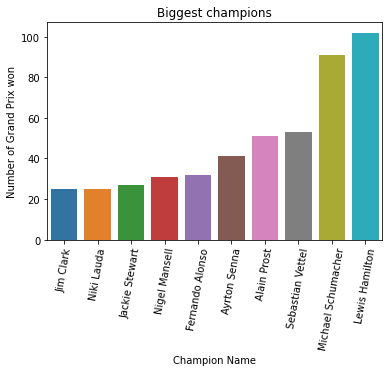

In [73]:
counts = df['champion_name'].value_counts()
top_10 = counts.head(10)
top_10 = top_10.sort_values()
df_top_10 = df[df['champion_name'].isin(top_10.index)]
sns.countplot(x='champion_name', data=df_top_10, order=top_10.index)
plt.xticks(rotation=80)
plt.xlabel('Champion Name')
plt.ylabel('Number of Grand Prix won')
plt.title('Biggest champions')

In [41]:
fig = px.bar(counts, x='raceName', y='count', color='season', height=600, width=1100)
fig.update_layout(showlegend=False)
fig.show()

Text(0.5, 1.0, 'Most Famous racetracks')

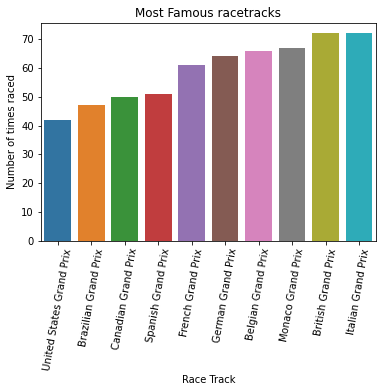

In [77]:
counts = df['raceName'].value_counts()
top_10 = counts.head(10)
top_10 = top_10.sort_values()
df_top_10 = df[df['raceName'].isin(top_10.index)]
sns.countplot(x='raceName', data=df_top_10, order=top_10.index)
plt.xticks(rotation=80)
plt.xlabel('Race Track')
plt.ylabel('Number of times raced')
plt.title('Most Famous racetracks')

In [62]:
import plotly.express as px

df_monaco = df[df['raceName'] == 'Monaco Grand Prix']
df_monaco_grouped = df_monaco.groupby('champion_name')['champion_name'].count().reset_index(name='count')
df_monaco_grouped = df_monaco_grouped.sort_values('count', ascending=False).head(10)

fig = px.bar(df_monaco_grouped, x='champion_name', y='count', text='count',
            color='count', height=500)
fig.update_layout(title='Champions with most wins in the Monaco Grand Prix',
                  xaxis_title='Champion Name', yaxis_title='Wins Count', 
                  xaxis_tickangle=80)
fig.show()

Text(0.5, 1.0, 'Champions with most wins in the Monaco Grand Prix')

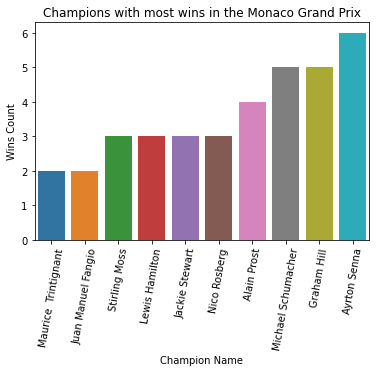

In [50]:
df_monaco = df[df['raceName'] == 'Monaco Grand Prix']
df_monaco_grouped = df_monaco.groupby('champion_name')['champion_name'].count().reset_index(name='count')
df_monaco_grouped = df_monaco_grouped.sort_values('count', ascending=True).tail(10)
sns.barplot(x='champion_name', y='count', data=df_monaco_grouped)
plt.xticks(rotation=80)
plt.xlabel('Champion Name')
plt.ylabel('Wins Count')
plt.title('Champions with most wins in the Monaco Grand Prix')


In [65]:
import plotly.express as px

top_20_winners = df.groupby("champion_name")["win_count"].sum().sort_values(ascending=False).head(20)
df_top_20 = df[df['champion_name'].isin(top_20_winners.index)]

fig = px.line(df_top_20, x="season", y="win_count", color="champion_name", line_shape='spline', render_mode='svg')
fig.update_layout(title='Win Count by Season for Top 20 Winners', xaxis_title='Season', yaxis_title='Win Count')
fig.show()


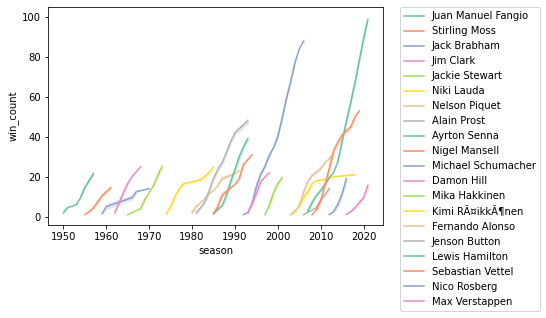

In [78]:
top_20_winners = df.groupby("champion_name")["win_count"].sum().sort_values(ascending=False).head(20)
df_top_20 = df[df['champion_name'].isin(top_20_winners.index)]
sns.lineplot(data=df_top_20, x="season", y="win_count", hue="champion_name",legend="full",palette='Set2');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [74]:

df = get_win_streak(df)
df.sample(1)

,season,round,url,raceName,Circuit,date,champion_name,time,FirstPractice,SecondPractice,ThirdPractice,Qualifying,Sprint,win_count,win_streak
530,1992,15,http://en.wikipedia.org/wiki/1992_Japanese_Gra...,Japanese Grand Prix,"{'circuitId': 'suzuka', 'url': 'http://en.wiki...",1992-10-25,Riccardo Patrese,NaN,NaN,NaN,NaN,NaN,NaN,6,1


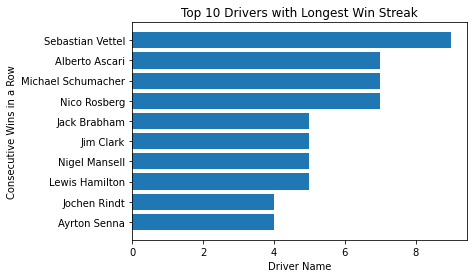

In [76]:
top_10 = df.nlargest(30, 'win_streak')
plt.barh(top_10['champion_name'], top_10['win_streak'])
plt.xlabel('Driver Name')
plt.ylabel('Consecutive Wins in a Row')
plt.title('Top 10 Drivers with Longest Win Streak')
plt.gca().invert_yaxis()
plt.show()

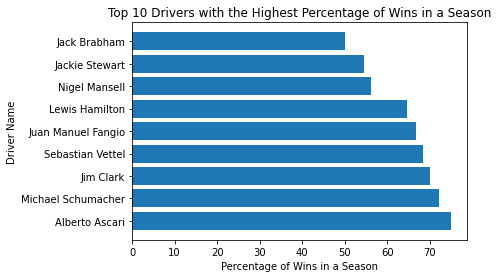

In [42]:
driver_wins = df.groupby(['season', 'champion_name']).size().reset_index(name='Wins')

total_races = df.groupby(['season']).size().reset_index(name='Total Races')
driver_wins = driver_wins.merge(total_races, on='season')
driver_wins['Percentage'] = 100 * driver_wins['Wins'] / driver_wins['Total Races']

top_10 = driver_wins.nlargest(23, 'Percentage')

plt.barh(top_10['champion_name'], top_10['Percentage'])
plt.xlabel('Percentage of Wins in a Season')
plt.ylabel('Driver Name')
plt.title('Top 10 Drivers with the Highest Percentage of Wins in a Season')
plt.show()
